In [1]:
# import needed resource
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#import datafile
df = pd.read_csv(r"C:\Users\user\Downloads\Detailed Hotelinfo_v2_cleaned.csv")
df.head()

,Rank,name,No_of_reviews,Rates,Hotel_class,MinPrice,MaxPrice,AvgPrice
0,0,The Upper House,4168,5.0,5.0,3193.0,4790.0,3991.5
1,1,W Hong Kong,6517,5.0,5.0,2087.0,2905.0,2496.0
2,2,Hotel ICON,8786,5.0,5.0,1137.0,2422.0,1779.5
3,3,The St. Regis Hong Kong,913,5.0,5.0,3676.0,5140.0,4408.0
4,4,The Ritz-Carlton Hong Kong,5732,5.0,5.0,3076.0,3980.0,3528.0


In [3]:
#count the no. of hotels in each class
sums = df.groupby(df["Hotel_class"]).count()
sums

,Rank,name,No_of_reviews,Rates,MinPrice,MaxPrice,AvgPrice
Hotel_class,,,,,,,
3.0,107,107,107,107,107,107,107
3.5,7,7,7,7,7,7,7
4.0,113,113,113,113,113,113,113
5.0,45,45,45,45,45,45,45


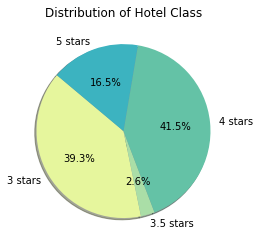

In [4]:
#create pie chart for hotel class
count_data = sums["name"]
class_data= ["3 stars","3.5 stars","4 stars","5 stars" ]
colors = ["#E6F69D", "#AADEA7", "#64C2A6", "#3CB3C0","#2D87BB","#024064"]
plt.pie(count_data, labels=class_data,colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Distribution of Hotel Class")
plt.show()

In [5]:
#count the no. of hotels in each rating group
sums2 = df.groupby(df["Rates"]).count()
sums2

,Rank,name,No_of_reviews,Hotel_class,MinPrice,MaxPrice,AvgPrice
Rates,,,,,,,
2.5,1,1,1,1,1,1,1
3.0,22,22,22,22,22,22,22
3.5,57,57,57,57,57,57,57
4.0,96,96,96,96,96,96,96
4.5,81,81,81,81,81,81,81
5.0,15,15,15,15,15,15,15


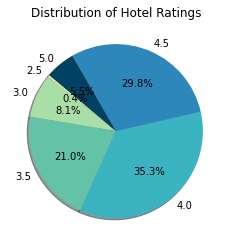

In [6]:
#create pie chart for hotel ratings
count2_data = sums2["name"]
class2_data= ["2.5","3.0","3.5","4.0","4.5","5.0"]
colors = ["#E6F69D", "#AADEA7", "#64C2A6", "#3CB3C0","#2D87BB","#024064"]
plt.pie(count2_data, labels=class2_data,colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Distribution of Hotel Ratings")
plt.show()

In [7]:
#mean of AvgPrice in different class
Mean_AvgPrice_df = df.groupby(by='Hotel_class')['AvgPrice'].mean()
Mean_AvgPrice_df

Hotel_class
3.0     747.336449
3.5     840.000000
4.0    1093.986726
5.0    2279.844444
Name: AvgPrice, dtype: float64

In [8]:
#standard deviation of AvgPrice in different class
std_AvgPrice_df = df.groupby(by='Hotel_class')['AvgPrice'].std()
std_AvgPrice_df

Hotel_class
3.0     634.256368
3.5     230.544645
4.0     511.425435
5.0    1375.638537
Name: AvgPrice, dtype: float64

<AxesSubplot:title={'center':'Rank Vs Price'}, xlabel='AvgPrice', ylabel='Rank'>

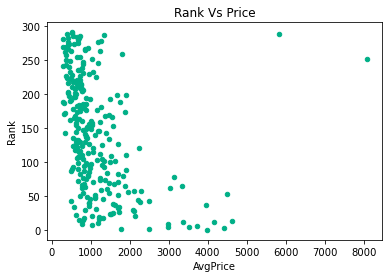

In [9]:
#relation between rank and price
df.plot(kind='scatter',
                    x='AvgPrice',
                    y='Rank',
                    color="#00AF87",
                    title='Rank Vs Price')

<AxesSubplot:title={'center':'Ranks Vs Reviews'}, xlabel='Rank', ylabel='No_of_reviews'>

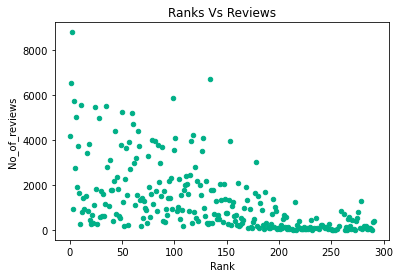

In [10]:
df.plot(kind='scatter',
                    x='Rank',
                    y='No_of_reviews',
                    color="#00AF87",
                    title='Ranks Vs Reviews')

In [11]:
#pivot table for box diagram
df_pivot1 = df.pivot_table(values='AvgPrice',columns='Hotel_class', index="Rank")
df_pivot1

Hotel_class,3.0,3.5,4.0,5.0
Rank,,,,
0,NaN,NaN,NaN,3991.5
1,NaN,NaN,NaN,2496.0
2,NaN,NaN,NaN,1779.5
3,NaN,NaN,NaN,4408.0
4,NaN,NaN,NaN,3528.0
...,...,...,...,...
287,1335.5,NaN,NaN,NaN
288,389.5,NaN,NaN,NaN
289,5829.5,NaN,NaN,NaN


<AxesSubplot:title={'center':'Price Range by Hotel Class '}>

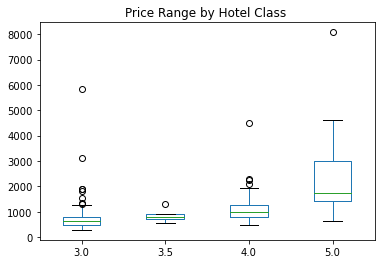

In [12]:
#box diagram to show price range
df_pivot1.plot(kind='box', title='Price Range by Hotel Class ')

In [13]:
df_pivot2 = df.pivot_table(values='No_of_reviews',columns='Hotel_class', index="Rank")
df_pivot2

Hotel_class,3.0,3.5,4.0,5.0
Rank,,,,
0,NaN,NaN,NaN,4168.0
1,NaN,NaN,NaN,6517.0
2,NaN,NaN,NaN,8786.0
3,NaN,NaN,NaN,913.0
4,NaN,NaN,NaN,5732.0
...,...,...,...,...
287,107.0,NaN,NaN,NaN
288,21.0,NaN,NaN,NaN
289,1.0,NaN,NaN,NaN


<AxesSubplot:title={'center':'Reviews by Hotel Class'}>

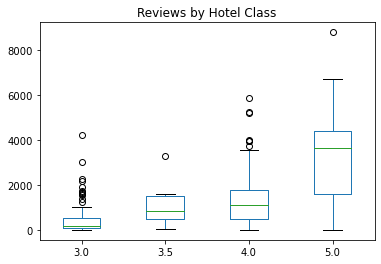

In [14]:
df_pivot2.plot(kind='box', title='Reviews by Hotel Class')

In [15]:
df_pivot3 = df.pivot_table(values='No_of_reviews',columns='Rates', index="Rank")
df_pivot3

Rates,2.5,3.0,3.5,4.0,4.5,5.0
Rank,,,,,,
0,NaN,NaN,NaN,NaN,NaN,4168.0
1,NaN,NaN,NaN,NaN,NaN,6517.0
2,NaN,NaN,NaN,NaN,NaN,8786.0
3,NaN,NaN,NaN,NaN,NaN,913.0
4,NaN,NaN,NaN,NaN,NaN,5732.0
...,...,...,...,...,...,...
287,NaN,107.0,NaN,NaN,NaN,NaN
288,NaN,NaN,21.0,NaN,NaN,NaN
289,NaN,NaN,NaN,1.0,NaN,NaN


<AxesSubplot:title={'center':'Reviews by Hotel Ratings'}>

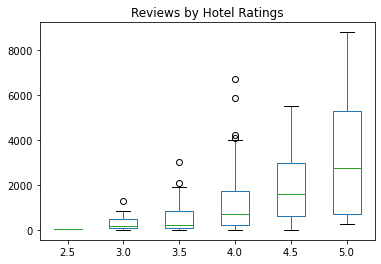

In [16]:
df_pivot3.plot(kind='box', title='Reviews by Hotel Ratings')

# Testing Stuff (not for reporting)

In [17]:
#test
df_pivot4 = df.pivot_table(values='Rates',columns='Hotel_class', index="Rank")
df_pivot4

Hotel_class,3.0,3.5,4.0,5.0
Rank,,,,
0,NaN,NaN,NaN,5.0
1,NaN,NaN,NaN,5.0
2,NaN,NaN,NaN,5.0
3,NaN,NaN,NaN,5.0
4,NaN,NaN,NaN,5.0
...,...,...,...,...
287,3.0,NaN,NaN,NaN
288,3.5,NaN,NaN,NaN
289,4.0,NaN,NaN,NaN


<AxesSubplot:>

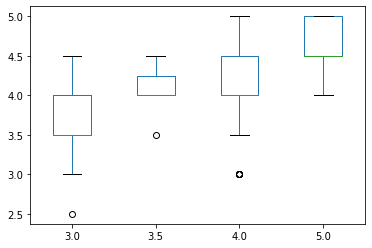

In [18]:
#test
df_pivot4.plot(kind='box', title='')

<AxesSubplot:title={'center':'Ratings Vs No_of_reviews'}, xlabel='No_of_reviews', ylabel='Rates'>

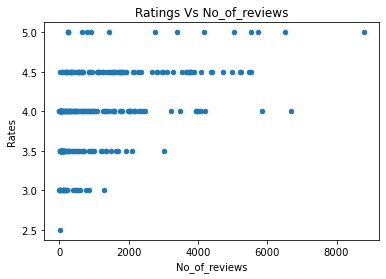

In [19]:
#testing 
df.plot(kind='scatter',
                    x='No_of_reviews',
                    y='Rates',
                    title='Ratings Vs No_of_reviews')

<AxesSubplot:title={'center':'Ranks Vs Ratings'}, xlabel='Rank', ylabel='Rates'>

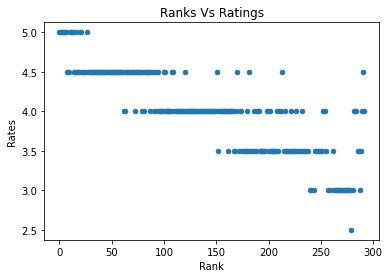

In [20]:
#testing
df.plot(kind='scatter',
                    x='Rank',
                    y='Rates',
                    title='Ranks Vs Ratings')

In [21]:
#testing
Std_rates_df = df.groupby(by='Rates')['Rank'].std()
Std_rates_df

Rates
2.5          NaN
3.0    12.454332
3.5    31.733747
4.0    51.607931
4.5    45.530698
5.0     8.008924
Name: Rank, dtype: float64